# CRQ1

#### Does the 'fare per mile' change among boroughs? aka, which boroughs charge the passengers with more money per mile?
#### We need to consider the traffic congestion too. The price might depend on the trafic taxis find in their way. 

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import time

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\samin\Desktop\Homework2\Data\yellow_tripdata_2018-01.csv', 
                 usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance','PULocationID','fare_amount'])

In [3]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,fare_amount
0,2018-01-01 00:21:05,2018-01-01 00:24:23,0.5,41,4.5
1,2018-01-01 00:44:55,2018-01-01 01:03:05,2.7,239,14.0
2,2018-01-01 00:08:26,2018-01-01 00:14:21,0.8,262,6.0
3,2018-01-01 00:20:22,2018-01-01 00:52:51,10.2,140,33.5
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2.5,246,12.5


In [4]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 5 columns):
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
trip_distance            float64
PULocationID             int64
fare_amount              float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.4 GB


In [5]:
#Change data type to reduce memory usage
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [6]:
df['PULocationID'] = df['PULocationID'].astype(np.uint16)

In [7]:
#df['Duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/pd.Timedelta('1 minute')

In [8]:
#We need to extract Month from out datetime object
df['Month']=pd.DatetimeIndex(df['tpep_pickup_datetime']).year
df['Month']=pd.DatetimeIndex(df['tpep_pickup_datetime']).month
df['Month']=pd.DatetimeIndex(df['tpep_pickup_datetime']).day
df['Month']=pd.DatetimeIndex(df['tpep_pickup_datetime']).hour

In [9]:
df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

In [10]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 4 columns):
trip_distance    float64
PULocationID     uint16
fare_amount      float64
Month            int64
dtypes: float64(2), int64(1), uint16(1)
memory usage: 217.2 MB


In [11]:
df.head()

,trip_distance,PULocationID,fare_amount,Month
0,0.5,41,4.5,1
1,2.7,239,14.0,1
2,0.8,262,6.0,1
3,10.2,140,33.5,1
4,2.5,246,12.5,1


In [12]:
df.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 4 columns):
trip_distance    float64
PULocationID     uint16
fare_amount      float64
Month            int64
dtypes: float64(2), int64(1), uint16(1)
memory usage: 217.2 MB


In [13]:
df.head()

,trip_distance,PULocationID,fare_amount,Month
0,0.5,41,4.5,1
1,2.7,239,14.0,1
2,0.8,262,6.0,1
3,10.2,140,33.5,1
4,2.5,246,12.5,1


In [14]:
df.shape

(8759874, 4)

In [15]:
df.groupby('Month').count()

,trip_distance,PULocationID,fare_amount
Month,,,
1,8759557,8759557,8759557
2,71,71,71
7,6,6,6
12,240,240,240


In [16]:
#delete those rows with month!=1

#df.drop(df[(df.Month == 2) | (df.Month == 7) | (df.Month == 12)].index, inplace=True)

In [17]:
df.shape

(8759874, 4)

In [18]:
df.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 4 columns):
trip_distance    float64
PULocationID     uint16
fare_amount      float64
Month            int64
dtypes: float64(2), int64(1), uint16(1)
memory usage: 217.2 MB


In [19]:
df['Month']=df['Month'].astype(np.uint8)

In [20]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 4 columns):
trip_distance    float64
PULocationID     uint16
fare_amount      float64
Month            uint8
dtypes: float64(2), uint16(1), uint8(1)
memory usage: 158.7 MB


In [21]:
df.head()

,trip_distance,PULocationID,fare_amount,Month
0,0.5,41,4.5,1
1,2.7,239,14.0,1
2,0.8,262,6.0,1
3,10.2,140,33.5,1
4,2.5,246,12.5,1


In [22]:
#Check 'trip_distance' and 'fare_amount'
#'fare_amount' shouldn't be zero also 'trip_distance'. Negative values also make the dataset dirty so we get rid of them. 

#df.drop(df[(df.trip_distance==0)].index, inplace=True)
#df.drop(df[(df.fare_amount==0)].index, inplace=True)
#df = df[~(df['trip_distance'] < 0)]
#df = df[~(df['fare_amount'] < 0)]

In [23]:
df['trip_distance'].describe()

count    8.759874e+06
mean     2.804001e+00
std      6.412346e+01
min      0.000000e+00
25%      9.100000e-01
50%      1.550000e+00
75%      2.840000e+00
max      1.894838e+05
Name: trip_distance, dtype: float64

In [24]:
df['fare_amount'].describe()

count    8.759874e+06
mean     1.224434e+01
std      1.168321e+01
min     -4.500000e+02
25%      6.000000e+00
50%      9.000000e+00
75%      1.350000e+01
max      8.016000e+03
Name: fare_amount, dtype: float64

In [25]:
 #Data cleaning 
    
df.drop(df[df['trip_distance']>3].index, inplace=True)
df.drop(df[df['trip_distance']<0.5].index, inplace=True) 

df.drop(df[df['fare_amount']>10].index, inplace=True)
df.drop(df[df['fare_amount']<1].index, inplace=True)

In [26]:
df.shape

(4799210, 4)

### Part1: Find the fare amount per mile. For each borough, calculate mean and standard deviation of values. Plot the result and run the t-test on each pair of two boroughs possible

In [27]:
df['price_per_mile'] = df['fare_amount']/df['trip_distance']

In [28]:
df['price_per_mile'].min()

0.35714285714285715

In [29]:
df.head(10)

,trip_distance,PULocationID,fare_amount,Month,price_per_mile
0,0.50,41,4.5,1,9.000000
2,0.80,262,6.0,1,7.500000
5,0.50,143,4.5,1,9.000000
6,1.70,50,9.0,1,5.294118
7,0.70,239,4.0,1,5.714286
8,1.00,238,5.5,1,5.500000
9,0.70,170,5.5,1,7.857143
10,0.60,162,5.5,1,9.166667
12,1.04,137,5.5,1,5.288462
13,1.22,224,7.5,1,6.147541


In [30]:
df.drop(columns = ['trip_distance', 'fare_amount'], inplace=True)

In [31]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799210 entries, 0 to 8759870
Data columns (total 3 columns):
PULocationID      uint16
Month             uint8
price_per_mile    float64
dtypes: float64(1), uint16(1), uint8(1)
memory usage: 87.0 MB


In [32]:
df.head()

,PULocationID,Month,price_per_mile
0,41,1,9.000000
2,262,1,7.500000
5,143,1,9.000000
6,50,1,5.294118
7,239,1,5.714286


In [33]:
#Read 'taxi_zone_lookup' dataset

borough = pd.read_csv(r'C:\Users\samin\Desktop\Homework2\taxi_zone_lookup.csv', usecols = ['LocationID', 'Borough'])

In [34]:
borough.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 2 columns):
LocationID    265 non-null int64
Borough       265 non-null object
dtypes: int64(1), object(1)
memory usage: 18.9 KB


In [35]:
borough.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [36]:
#Merge df and borough 

result = pd.merge(df,
                 borough,
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )


In [37]:
result.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799210 entries, 0 to 4799209
Data columns (total 5 columns):
PULocationID      uint16
Month             uint8
price_per_mile    float64
LocationID        int64
Borough           object
dtypes: float64(1), int64(1), object(1), uint16(1), uint8(1)
memory usage: 425.3 MB


In [38]:
result.head()

,PULocationID,Month,price_per_mile,LocationID,Borough
0,41,1,9.000000,41,Manhattan
1,41,1,6.250000,41,Manhattan
2,41,1,6.578947,41,Manhattan
3,41,1,6.132075,41,Manhattan
4,41,1,4.285714,41,Manhattan


In [39]:
del df
del borough

In [40]:
result.drop(columns = ['PULocationID', 'LocationID'], inplace =  True)

In [41]:
result.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799210 entries, 0 to 4799209
Data columns (total 3 columns):
Month             uint8
price_per_mile    float64
Borough           object
dtypes: float64(1), object(1), uint8(1)
memory usage: 379.5 MB


In [42]:
result.head()

,Month,price_per_mile,Borough
0,1,9.000000,Manhattan
1,1,6.250000,Manhattan
2,1,6.578947,Manhattan
3,1,6.132075,Manhattan
4,1,4.285714,Manhattan


In [43]:
result['price_per_mile'].min()

0.35714285714285715

In [44]:
result['price_per_mile'].max()

20.0

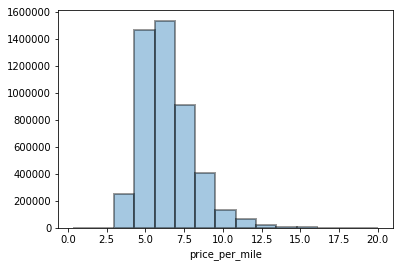

In [45]:
sns.distplot(result['price_per_mile'], kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=2))

In [46]:
#result.drop([])
result.drop(result[(result.price_per_mile <1) | (result.price_per_mile>200)].index, inplace=True)

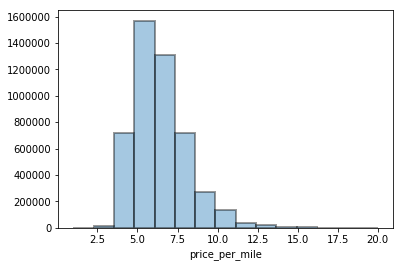

In [47]:
sns.distplot(result['price_per_mile'], kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=2))

In [48]:
result['price_per_mile'].min()

1.0

In [49]:
#To have a normalized distribution, we drop prices higher than 25
result.drop(result[(result.price_per_mile>10)].index, inplace=True)

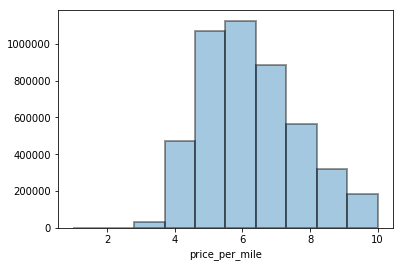

In [50]:
sns.distplot(result['price_per_mile'], kde=False, bins=10, hist_kws=dict(edgecolor="k", linewidth=2))

In [51]:
#looks almost narmalized

In [52]:
result.groupby('Borough').count()

,Month,price_per_mile
Borough,,
Bronx,2805,2805
Brooklyn,42851,42851
EWR,12,12
Manhattan,4492893,4492893
Queens,42662,42662
Staten Island,30,30
Unknown,79860,79860


In [53]:
#delete rows with Borough='unknown' and Borough='EWR'
result.drop(result[(result.Borough == 'EWR') | (result.Borough == 'Unknown')].index, inplace=True)
result.shape

(4581241, 3)

In [54]:
result.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4581241 entries, 0 to 4799209
Data columns (total 3 columns):
Month             uint8
price_per_mile    float64
Borough           object
dtypes: float64(1), object(1), uint8(1)
memory usage: 362.5 MB


In [55]:
M=result.groupby('Borough')['price_per_mile'].mean()
print(M)

Borough
Bronx            5.814156
Brooklyn         5.832325
Manhattan        6.275815
Queens           5.563733
Staten Island    6.044153
Name: price_per_mile, dtype: float64


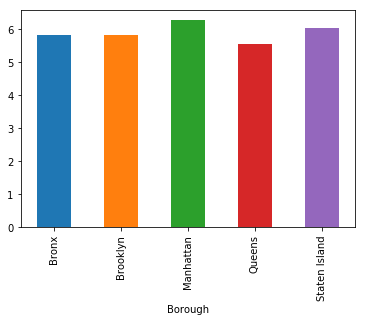

In [56]:
#plotting
M.plot.bar()

#### Manhattan seems to be the most expensive area, Staten Island comes in the second palce. Queens charges each passenger the lowest amount

In [57]:
S=result.groupby('Borough')['price_per_mile'].std()

In [58]:
print(S)

Borough
Bronx            1.334353
Brooklyn         1.335033
Manhattan        1.426326
Queens           1.322763
Staten Island    1.525956
Name: price_per_mile, dtype: float64


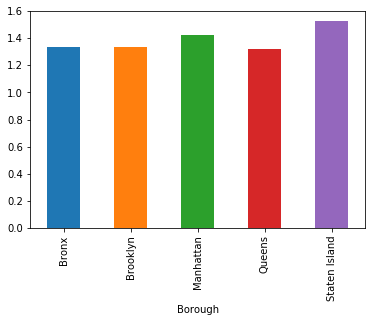

In [59]:
S.plot.bar()

#### Seems to be that the variation in values for Staten Island is the highest. This makes us wonder if the its mean has a true value. 

# T-Test

In [60]:
from scipy import stats
#import scipy.stats 
#Welch's t-test
#scipy.stats.ttest_ind(two_data.loc['cat'], two_data.loc['cat2'], equal_var=False)#default is two sided t-test 
#(ttest_ind= independent t- test also called two sapmle t-test or student's t-test)


In [61]:
#independent t-test assumption


In [62]:
#ttest_ind(bronx, brooklyn)

#which type of t-test to apply?
#We check if independent t-test is going to have reliable results for our case?
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Staten Island', 'Queens']
iterables = [['Bronx', 'Brooklyn', 'Manhattan', 'Staten Island', 'Queens'], ['t-value', 'p-value', "H0 hypothesis"]]
my_index = pd.MultiIndex.from_product(iterables)
dt = pd.DataFrame(index=my_index, columns=boroughs)


In [63]:
for i in boroughs:
    a = result.loc[result.Borough==i]["price_per_mile"]
    for j in boroughs:
            b = result.loc[result.Borough==j]["price_per_mile"]
            t2, p2 = stats.ttest_ind(a,b, equal_var=False)
            dt.loc[(i,"t-value"),j]=t2
            dt.loc[(i,"p-value"),j]=p2
            if(p2>0.05):
               dt.loc[(i,"H0 hypothesis"),j]='Fail to Reject H0'
            else:
               dt.loc[(i,"H0 hypothesis"),j]='Reject H0'

In [64]:
dt

Bronx           Brooklyn  \
Bronx         t-value                        0          -0.698646   
              p-value                        1           0.484824   
              H0 hypothesis  Fail to Reject H0  Fail to Reject H0   
Brooklyn      t-value                 0.698646                  0   
              p-value                 0.484824                  1   
              H0 hypothesis  Fail to Reject H0  Fail to Reject H0   
Manhattan     t-value                  18.3174            68.3945   
              p-value              6.89177e-71                  0   
              H0 hypothesis          Reject H0          Reject H0   
Staten Island t-value                 0.822191           0.760126   
              p-value                  0.41757           0.453309   
              H0 hypothesis  Fail to Reject H0  Fail to Reject H0   
Queens        t-value                 -9.63325           -29.5519   
              p-value              1.14115e-21       5.71104e-191   
              H0 hypothesis          Reject H0          Reject H0   

                                     Manhattan      Staten Island  \
Bronx         t-value                 -18.3174          -0.822191   
              p-value              6.89177e-71            0.41757   
              H0 hypothesis          Reject H0  Fail to Reject H0   
Brooklyn      t-value                 -68.3945          -0.760126   
              p-value                        0           0.453309   
              H0 hypothesis          Reject H0  Fail to Reject H0   
Manhattan     t-value                        0           0.831519   
              p-value                        1           0.412475   
              H0 hypothesis  Fail to Reject H0  Fail to Reject H0   
Staten Island t-value                -0.831519                  0   
              p-value                 0.412475                  1   
              H0 hypothesis  Fail to Reject H0  Fail to Reject H0   
Queens        t-value                 -110.582           -1.72395   
              p-value                        0          0.0953524   
              H0 hypothesis          Reject H0  Fail to Reject H0   

                                        Queens  
Bronx         t-value                  9.63325  
              p-value              1.14115e-21  
              H0 hypothesis          Reject H0  
Brooklyn      t-value                  29.5519  
              p-value             5.71104e-191  
              H0 hypothesis          Reject H0  
Manhattan     t-value                  110.582  
              p-value                        0  
              H0 hypothesis          Reject H0  
Staten Island t-value                  1.72395  
              p-value                0.0953524  
              H0 hypothesis  Fail to Reject H0  
Queens        t-value                        0  
              p-value                        1  
              H0 hypothesis  Fail to Reject H0

##### these are the t-values and p-values that I get! I am reading to understand if this t-test is appropriate for our data, hence the results are meaningful 


## Taking traffic congestion into consideration


In [ ]:
#We divide values in 'price_per_mile' by values in 'Duration' column
result['price_duration']=result['price_per_mile']/result['Duration']

In [ ]:
s=result.groupby('Borough')['price_duration'].mean()
print(s)

In [ ]:
s.plot.bar()

In [ ]:
m=result.groupby('Borough')['price_duration'].std()
print(s)

In [ ]:
m.plot.bar()

In [ ]:
#T-Test

In [ ]:
dt2 = pd.DataFrame(index=my_index, columns=boroughs)

In [ ]:
for i in boroughs:
    a = result.loc[result.Borough==i]["price_per_mile"]
    for j in boroughs:
            b = result.loc[result.Borough==j]["price_per_mile"]
            b = b.dropna()
            t2, p2 = stats.ttest_ind(a,b)
            #T.append(t2)
            #P.append(p2)
            dt2.loc[(i,"t-value"),j]=t2
            dt2.loc[(i,"p-value"),j]=p2
            if(p2>0.05):
               dt2.loc[(i,"H0 hypothesis"),j]='Fail to Reject H0'
            else:
               dt2.loc[(i,"H0 hypothesis"),j]='Reject H0'

In [ ]:
dt2

### For 2018

In [18]:
DF = []

for i in range(1, 7):
    df2018 = pd.read_csv(r"C:\Users\samin\Desktop\Homework2\Data\yellow_tripdata_2018-0{}.csv".format(i), usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'fare_amount', 'PULocationID'])
    
    #change the type to datetime
    df2018['tpep_pickup_datetime']=pd.to_datetime(df2018['tpep_pickup_datetime'])
    df2018['tpep_dropoff_datetime']=pd.to_datetime(df2018['tpep_dropoff_datetime'])
    
    
    #extract necessary columns
    df2018['Year'] = pd.DatetimeIndex(df2018['tpep_pickup_datetime']).year 
    df2018['Month'] = pd.DatetimeIndex(df2018['tpep_pickup_datetime']).month
   
     
    #some data-cleaning
    yer = 2018
    df2018.drop(df2018[(df2018.Year != yer)].index, inplace=True)
    mth = i   
    df2018.drop(df2018[(df2018.Month) !=mth].index, inplace=True)
    
    df2018.drop(df2018[df2018['trip_distance']<0.5].index, inplace=True) 
    df2018.drop(df2018[df2018['fare_amount']<1].index, inplace=True)
    
    
    #dropping locations with ID=1 wich refer to EWR and ID= 265 and 264 wich refer to Unknown
    #df2018.drop(df2018[df2018['PULocationID']==1 & df2018['PULocationID']==264 & df2018['PULocationID']==265].index, inplace=True)
    
    df2018['price_per_mile']=df2018['fare_amount']/df2018['trip_distance']
    df2018.drop(df2018[df2018['price_per_mile']<0].index, inplace=True)
    
    df2018['duration']=(df2018['tpep_dropoff_datetime']-df2018['tpep_pickup_datetime'])/pd.Timedelta('1 minute')
    
    df2018.drop(columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'fare_amount', 'trip_distance'], inplace=True)
    df2018.drop(df2018[df2018['duration']<5].index, inplace=True)
    
    df2018['price_duration']=df2018['price_per_mile']/df2018['duration']
    df2018.drop(df2018[df2018['price_duration']<0].index, inplace=True)
    
    DF.append(df2018)
    
    del df2018

In [20]:
DF.shape()

AttributeError: 'list' object has no attribute 'shape'